# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales (CNN)
- Redes neuronales recurrentes (RNN)

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [3]:
path_colab_notebooks = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/'

## LeNet

LeNet es una estructura de red neuronal convolucional propuesta por Yann LeCun y otros en 1989. En general, LeNet se refiere a LeNet-5 y es una red neuronal convolucional simple. El paper donde presentaron la arquitectura es el siguiente: 

- LeCun, Y.; Boser, B.; Denker, J. S.; Henderson, D.; Howard, R. E.; Hubbard, W. & Jackel, L. D. (1989). Backpropagation applied to handwritten zip code recognition. Neural Computation, 1(4):541-551.

En 1989, Yann LeCun et al., de los Laboratorios Bell, aplicaron por primera vez el algoritmo de retropropagación a aplicaciones prácticas, y creyeron que la capacidad de aprendizaje de la generalización de la red podía mejorarse en gran medida proporcionando restricciones del dominio de la tarea. Combinó una red neuronal convolucional entrenada mediante algoritmos de retropropagación para leer números escritos a mano y la aplicó con éxito en la identificación de números de códigos postales escritos a mano proporcionados por el Servicio Postal de Estados Unidos.

Ese mismo año, LeCun describió en otro artículo un pequeño problema de reconocimiento de dígitos manuscritos y demostró que, aunque el problema es linealmente separable, las redes de una sola capa mostraban una escasa capacidad de generalización. Cuando se utilizaban detectores de características invariantes en una red multicapa restringida, el modelo podía funcionar muy bien. Creía que estos resultados demostraban que minimizar el número de parámetros libres en la red neuronal podía mejorar la capacidad de generalización de la red neuronal.

La LeNet-5 significa la aparición de la CNN (Red Neuronal Convolucional) y define los componentes básicos de la CNN, pero no fue popular en ese momento debido a la falta de equipos de hardware, especialmente la GPU (Unidad de Procesamiento de Gráficos, un circuito electrónico especializado diseñado para manipular y alterar rápidamente la memoria para acelerar la creación de imágenes en una memoria intermedia destinada a la salida a un dispositivo de visualización) y otro algoritmo, como la SVM (Máquina de Soporte Vectorial) que puede lograr efectos similares o incluso superar la LeNet.

Desde el éxito de AlexNet en 2012, las CNN se han convertido en la mejor opción para las aplicaciones de visión por computador, y se han planteado muchos tipos diferentes de CNN, como la serie R-CNN. Hoy en día, los modelos CNN son bastante diferentes de LeNet, pero todos se desarrollan sobre la base de LeNet.

### Modelo y especificaciones

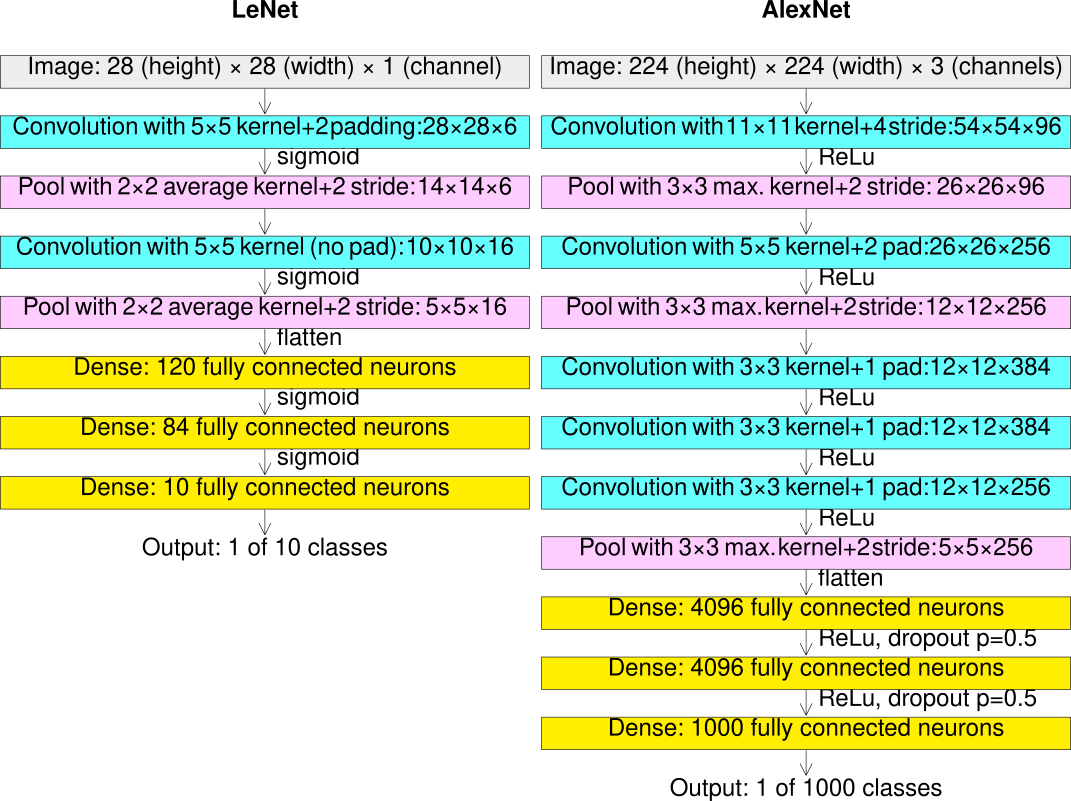

In [4]:
from IPython.display import SVG
SVG(valid_path + 'lenet_fig1.svg')

### Importando las librerías necesarias

In [5]:
import numpy as np
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2  
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf

### Preparando el conjunto de datos

Para esta red usaremos el conjunto de datos CIFAR-10 ya que LeNet fue desarrollado originalmente para solo 10 categorias de salida. Esta base de datos consta de 60000 imágenes a color RGB de 32$\times$32 pixeles en 10 clases. Se divide en 50000 imágenes para entrenamiento y 10000 imágenes para validación por cada clase.

Las 10 categorias son:

- airplane (avión).
- automobile (automóvil).
- bird (ave).
- cat (gato).
- deer (venado).
- dog (perro).
- frog (rana).
- horse (caballo).
- ship (barco).
- truck (camión).

In [6]:
from keras.datasets import cifar10

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar10.load_data()

Como antes hasta este punto hemos descargado los datasets de entrenamiento y validación. *x_train_original* y *x_test_original* son los conjuntos de datos con lás imágenes de entrenamiento y validación respectivamente, mientras que *y_train_original* y *y_test_original* son los datasets con las etiquetas.

Veíamos que la forma de *y_train_original* era la siguiente:

In [7]:
y_train_original.shape

(50000, 1)

In [8]:
y_train_original

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

Así que, inicialmente, había que convertirlo en su versión **one-hot-encoding**:

In [9]:
y_train = np_utils.to_categorical(y_train_original, 10)
y_test = np_utils.to_categorical(y_test_original, 10)

In [10]:
y_train.shape

(50000, 10)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

El siguiente paso es ver los datos de entrenamiento (x_train_original):

In [12]:
x_train_original.shape

(50000, 32, 32, 3)

In [13]:
x_train_original[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

Representa la imagen en los 3 canales RGB de 32$\times$32 píxeles. Nuevamente vamos a ver una, por ejemplo:

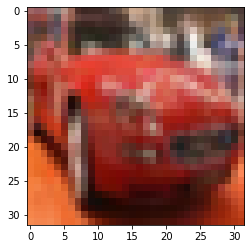

In [14]:
imgplot = plt.imshow(x_train_original[5])
plt.show()

LeNet se diseñó para imagenes en escala de grises de 28$\times$28 pixeles, vamos a respetar el formato de la imagen (el tamaño es muy similar, así que no lo cambiaremos).

In [15]:
# Valor escala gris = 0.2989 * r + 0.5870 * g + 0.1140 * b
rgb_weights = [0.2989, 0.5870, 0.1140]
x_train = np.dot(x_train_original[...,:3], rgb_weights)
x_test = np.dot(x_test_original[...,:3], rgb_weights)

In [16]:
x_train.shape

(50000, 32, 32)

In [17]:
x_test.shape

(10000, 32, 32)

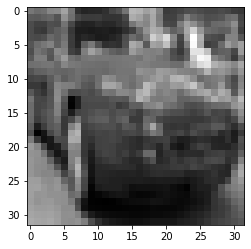

In [18]:
imgplot = plt.imshow(x_train[5], cmap='gray')
plt.show()

Lo que hacíamos a continuación, era normalizar las imágenes dividiéndo cada elemento por el numero de píxeles, es decir, 255. Con lo que obteníamos el array con valores de entre 0 y 1:

In [19]:
x_train = x_train/255.0
x_test = x_test/255.0

In [20]:
x_train[5]

array([[0.46632588, 0.42777255, 0.44139098, ..., 0.29514078, 0.25635137,
        0.24718588],
       [0.36949333, 0.36638196, 0.38569216, ..., 0.42231098, 0.44009725,
        0.28691137],
       [0.31552588, 0.27638078, 0.28213922, ..., 0.4541698 , 0.54186157,
        0.30649294],
       ...,
       [0.61425333, 0.59351765, 0.59238784, ..., 0.28624471, 0.35725529,
        0.41856863],
       [0.62759373, 0.61167333, 0.60847725, ..., 0.29743451, 0.34738902,
        0.38675216],
       [0.64498196, 0.62586549, 0.62428863, ..., 0.30902902, 0.32778314,
        0.35303843]])

### Arquitectura de la red: Red neuronal convolucional LeNet

Con esto, tenemos las imágenes a 32X32 píxeles normalizadas en *x_train* y *x_test*.

Dado que es una red convolucional pequeña, la construiremos siguiendo la misma estrategia que una red perceptron multicapa, utilizando `Sequential()` en Keras.

### Preparando el entorno

In [21]:
def create_lenet5(): 
  model = Sequential()
  model.add(Conv2D(20, (5, 5), padding='same', input_shape=(32, 32, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  model.add(Conv2D(50, (5, 5), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  model.add(Flatten())
  model.add(Dense(500))
  model.add(Activation('relu'))

  model.add(Dense(10))
  model.add(Activation('softmax'))

  return model

In [22]:
custom_lenet5 = create_lenet5()  
custom_lenet5.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])

Una vez hecho esto, vamos a ver un resumen del modelo creado:

In [23]:
custom_lenet5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 20)        520       
                                                                 
 activation (Activation)     (None, 32, 32, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                    

Para visualizar los modelos:

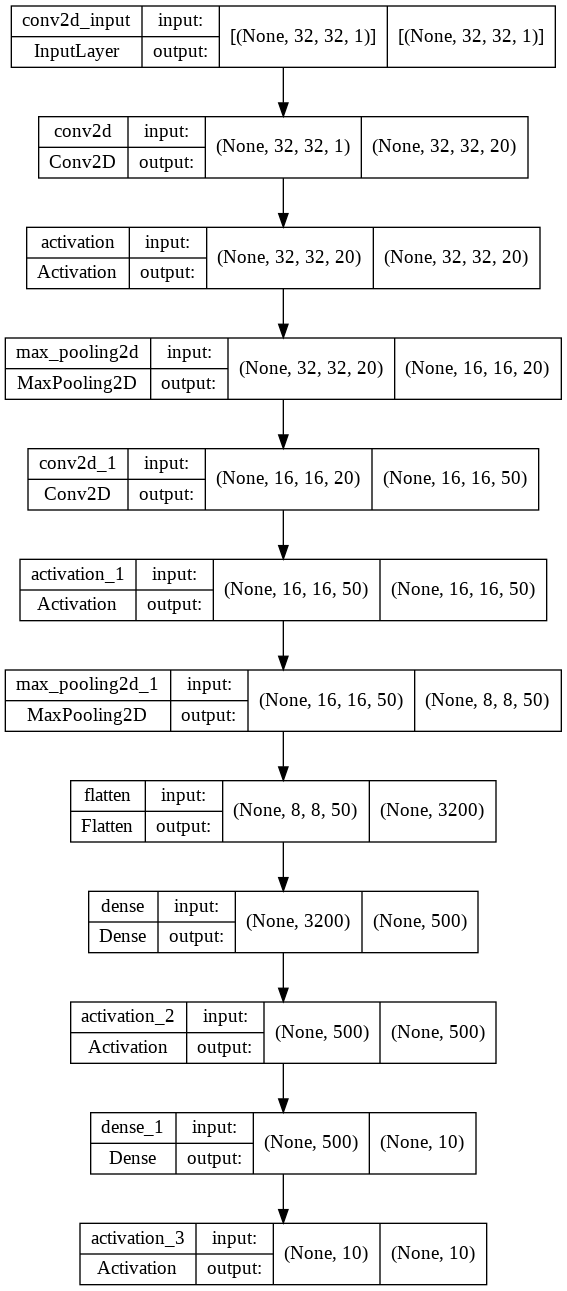

In [24]:
from keras.utils.vis_utils import plot_model

plot_model(custom_lenet5, valid_path + 'LeNet5.png', show_shapes=True)

Recordemos que la arquitectura perceptron multicapa tenia mas de 3.5 millones de parámetros a entrenar. Esto quiere decir que hemos aumentado la profundidad de la red, pero hemos reducido el número de parámetros a entrenar.

Pasamos a entrenar el modelo.

In [25]:
lenet5 = custom_lenet5.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 2.0677 - acc: 0.2513 - mse: 0.0843 - val_loss: 1.8506 - val_acc: 0.3417 - val_mse: 0.0782
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7116 - acc: 0.3957 - mse: 0.0744 - val_loss: 1.6304 - val_acc: 0.4199 - val_mse: 0.0715
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5599 - acc: 0.4514 - mse: 0.0691 - val_loss: 1.5507 - val_acc: 0.4476 - val_mse: 0.0690
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4566 - acc: 0.4895 - mse: 0.0653 - val_loss: 1.4743 - val_acc: 0.4669 - val_mse: 0.0669
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3625 - acc: 0.5240 - mse: 0.0616 - val_loss: 1.3494 - val_acc: 0.5233 - val_mse: 0.0615
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2776 - acc: 0.5551 - mse: 0.0582 - val_loss: 1.4216 - val_acc: 0.4981 - val_mse: 0.0637
Epo

Veamos las métricas obtenidas para el entrenamiento y validación gráficamente:

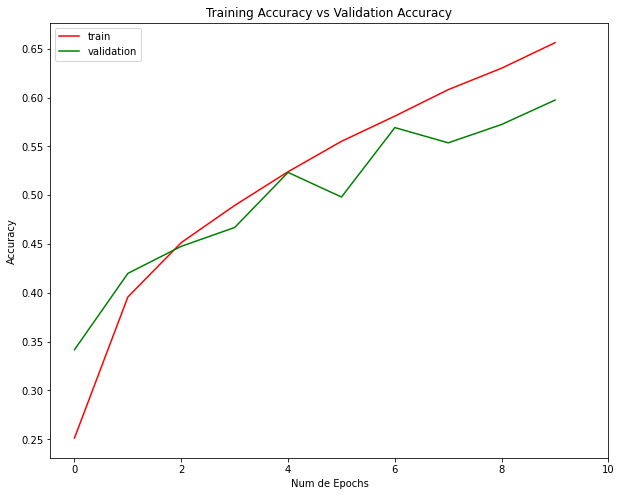

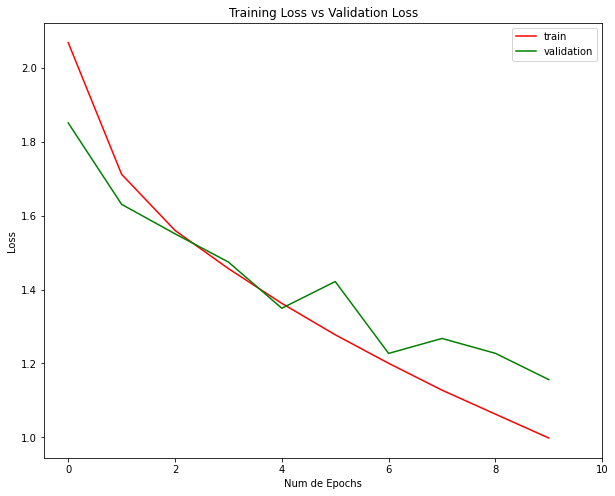

In [29]:
plt.figure(0)  
plt.plot(lenet5.history['acc'],'r')  
plt.plot(lenet5.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (10, 8)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(lenet5.history['loss'],'r')  
plt.plot(lenet5.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (10, 8)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

El entrenamiento ha dado muy buenos resultados y ha generalizado bien.

### Matriz de confusión

Pasemos ahora a ver la matriz de confusión y las métricas de *Accuracy*, *Recall* y *F1-score*.

Vamos a hacer una predicción sobre el dataset de validación y, a partir de ésta, generamos la matriz de confusión y mostramos las métricas mencionadas anteriormente:

313/313 [==============================] - 1s 2ms/step


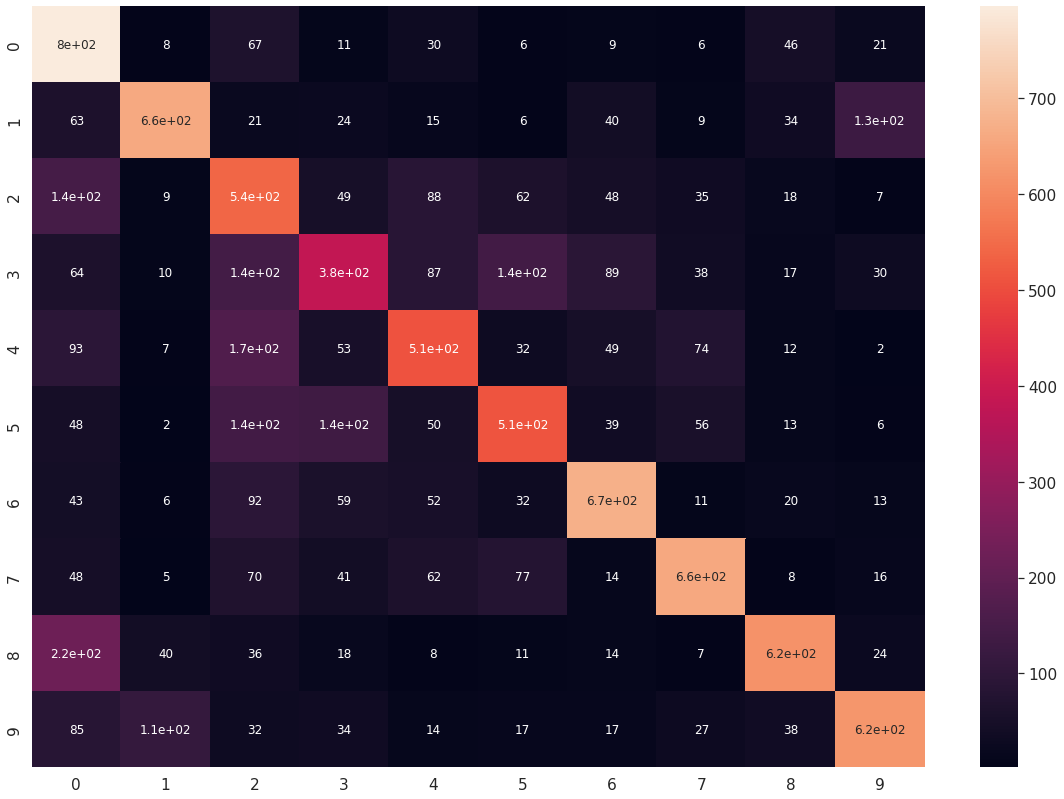

In [30]:
lenet5_pred = custom_lenet5.predict(x_test, batch_size=32, verbose=1)  
lenet5_predicted = np.argmax(lenet5_pred, axis=1)

lenet5_cm = confusion_matrix(np.argmax(y_test, axis=1), lenet5_predicted)

# Visualizing of confusion matrix
lenet5_df_cm = pd.DataFrame(lenet5_cm, range(10), range(10))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(lenet5_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()

Y por último, mostramos las métricas:

In [31]:
lenet5_report = classification_report(np.argmax(y_test, axis=1), lenet5_predicted)  
print(lenet5_report)

              precision    recall  f1-score   support

           0       0.50      0.80      0.61      1000
           1       0.77      0.66      0.71      1000
           2       0.41      0.54      0.47      1000
           3       0.47      0.38      0.42      1000
           4       0.56      0.51      0.53      1000
           5       0.57      0.51      0.54      1000
           6       0.68      0.67      0.68      1000
           7       0.71      0.66      0.69      1000
           8       0.75      0.62      0.68      1000
           9       0.72      0.62      0.67      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000



### Curva ROC (tasas de verdaderos positivos y falsos positivos)

Vamos a codificar la curva ROC para clasificación multiclase.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


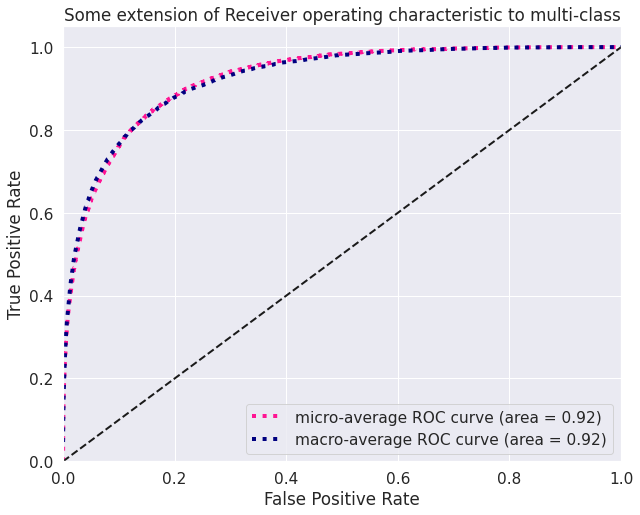

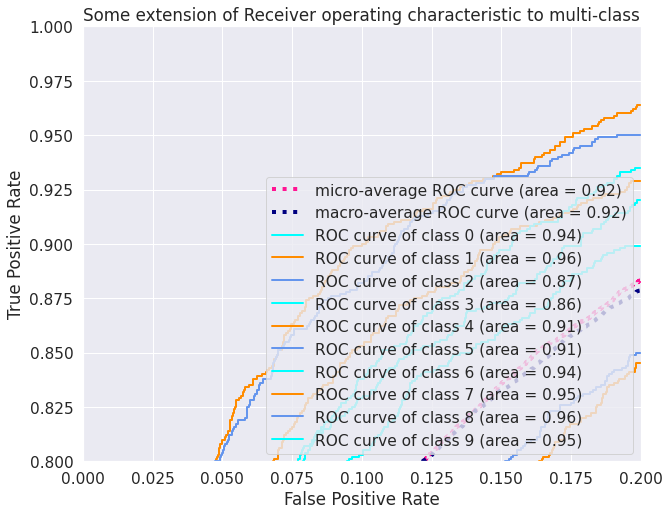

In [32]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 10

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], lenet5_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), lenet5_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(10), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()

Vamos a ver algunos resultados:

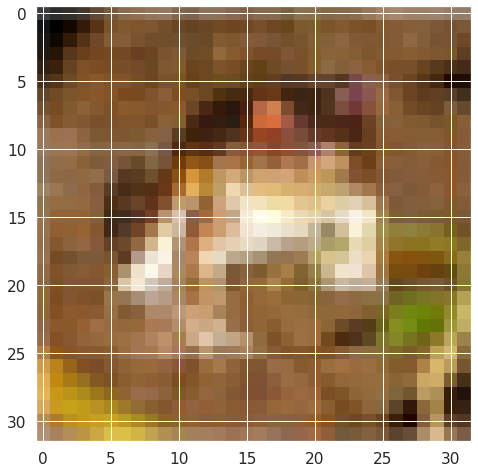

class for image: 3
predicted:         6


In [33]:
imgplot = plt.imshow(x_train_original[0])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[0])))  
print('predicted:         ' + str(lenet5_predicted[0]))

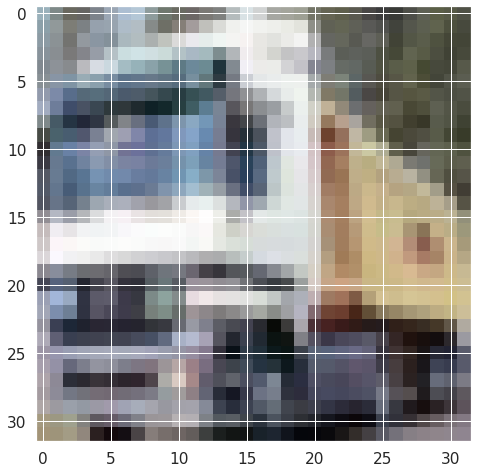

class for image: 8
predicted:         1


In [34]:
imgplot = plt.imshow(x_train_original[1])
plt.show()  
print('class for image: ' + str(np.argmax(y_test[1])))  
print('predicted:         ' + str(lenet5_predicted[1]))

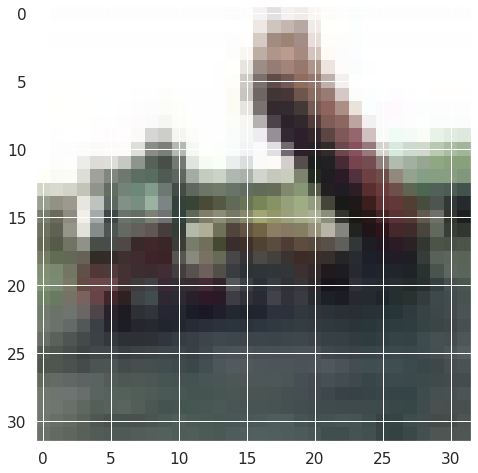

class for image: 8
predicted:         0


In [35]:
imgplot = plt.imshow(x_train_original[2])
plt.show()  
print('class for image: ' + str(np.argmax(y_test[2])))  
print('predicted:         ' + str(lenet5_predicted[2]))

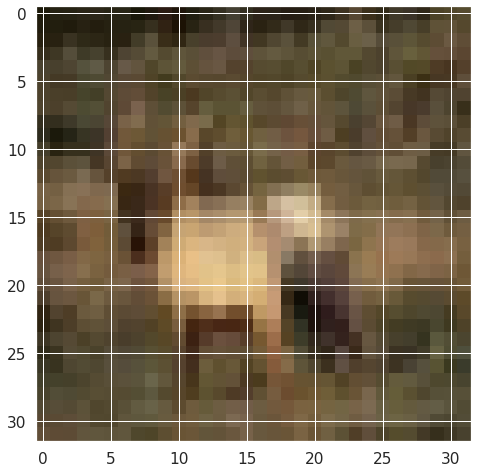

class for image: 0
predicted:         0


In [36]:
imgplot = plt.imshow(x_train_original[3])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[3])))  
print('predicted:         ' + str(lenet5_predicted[3]))

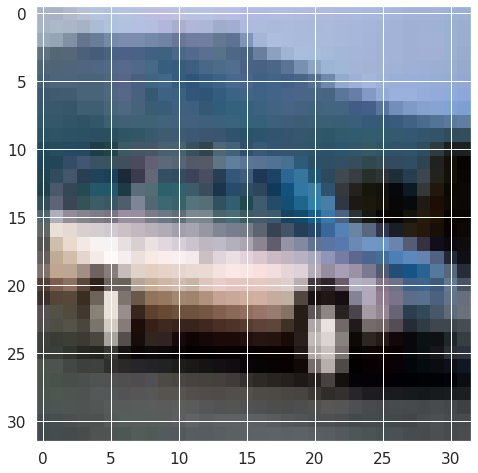

class for image: 6
predicted:         6


In [37]:
imgplot = plt.imshow(x_train_original[4])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[4])))  
print('predicted:         ' + str(lenet5_predicted[4]))

Salvaremos los datos del histórico de entrenamiento para compararlos con otros modelos. Además, vamos a salvar el modelo con los pesos entrenados para usarlos en el futuro.

In [38]:
# Modelo
custom_lenet5.save(valid_path + 'lenet5.h5')

# Histórico
with open(valid_path + 'lenet5_history.txt', 'wb') as file_pi:  
  pickle.dump(lenet5.history, file_pi)

A continuación, vamos a comparar las métricas con los modelos anteriores (obviaremos el código que carga los datos de dichos modelos).